# Indicator Results
Record results from different range indicators

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from trend_indicator_pipeline_pkg import MovingAveragePipeline, MomentumIndicatorPipeline, VolatilityIndicatorPipeline

from arcticdb.version_store.helper import ArcticMemoryConfig
from arcticdb import Arctic

In [6]:
DB_PATH = '/Users/zway/Desktop/BTC_Project/DB'

In [20]:
df = pd.read_csv('/Users/zway/Desktop/BTC_Project/raw_datasets/BTCUSD_1m_2023.csv')
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df.set_index('Timestamp', inplace=True)

trend = MovingAveragePipeline(lib_name='trend_indicators', store_path=f"lmdb://{DB_PATH}")
momentum = MomentumIndicatorPipeline(lib_name='momentum_indicators', store_path=f"lmdb://{DB_PATH}")
volatility = VolatilityIndicatorPipeline(lib_name='volatility_indicators', store_path=f"lmdb://{DB_PATH}")

20250706 00:11:13.681325 14071122 W arcticdb | LMDB path at /Users/zway/Desktop/BTC_Project/DB/ has already been opened in this process which is not supported by LMDB. You should only open a single Arctic instance over a given LMDB path. To continue safely, you should delete this Arctic instance and any others over the LMDB path in this process and then try again. Current process ID=[21811]
20250706 00:11:13.682544 14071122 W arcticdb | LMDB path at /Users/zway/Desktop/BTC_Project/DB/ has already been opened in this process which is not supported by LMDB. You should only open a single Arctic instance over a given LMDB path. To continue safely, you should delete this Arctic instance and any others over the LMDB path in this process and then try again. Current process ID=[21811]
20250706 00:11:13.683262 14071122 W arcticdb | LMDB path at /Users/zway/Desktop/BTC_Project/DB/ has already been opened in this process which is not supported by LMDB. You should only open a single Arctic instanc

## Different Moving Averages
SMA

In [8]:
df = trend.compute_sma(df, days=7)
df = trend.compute_sma(df, days=30)
df = trend.compute_sma(df, days=200)

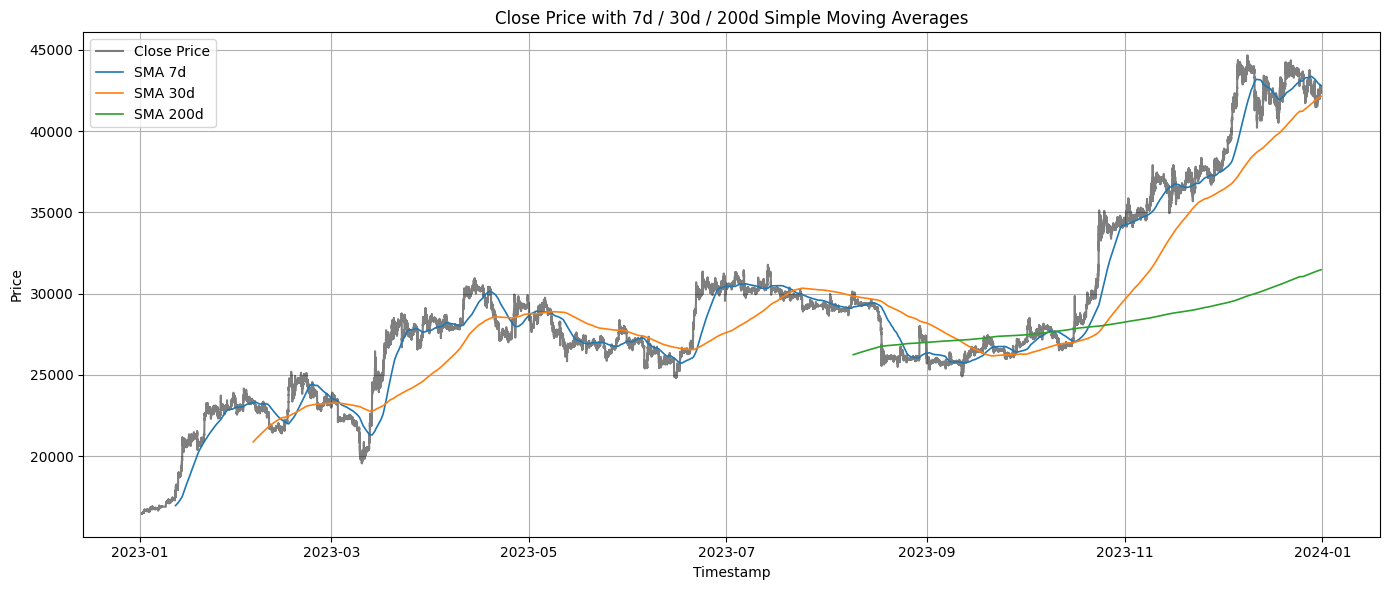

In [9]:
plt.figure(figsize=(14, 6))
plt.plot(df.index, df['Close'], label='Close Price', color='black', alpha=0.5)

# Add SMA lines
plt.plot(df.index, df['sma_7d'], label='SMA 7d', linewidth=1.2)
plt.plot(df.index, df['sma_30d'], label='SMA 30d', linewidth=1.2)
plt.plot(df.index, df['sma_200d'], label='SMA 200d', linewidth=1.2)

# configuration
plt.title('Close Price with 7d / 30d / 200d Simple Moving Averages')
plt.xlabel('Timestamp')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

EMA

In [10]:
# EMA
df = trend.compute_ema(df, days=7)
df = trend.compute_ema(df, days=30)
df = trend.compute_ema(df, days=200)

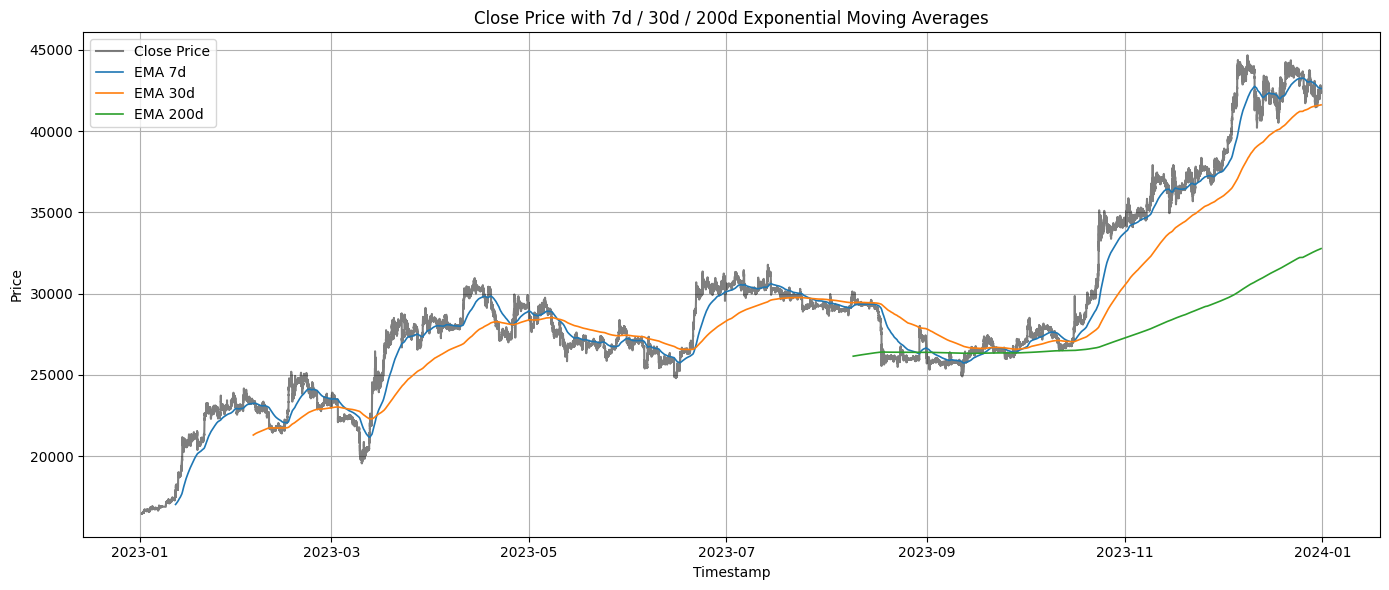

In [11]:
plt.figure(figsize=(14, 6))
plt.plot(df.index, df['Close'], label='Close Price', color='black', alpha=0.5)

# Add SMA lines
plt.plot(df.index, df['ema_7d'], label='EMA 7d', linewidth=1.2)
plt.plot(df.index, df['ema_30d'], label='EMA 30d', linewidth=1.2)
plt.plot(df.index, df['ema_200d'], label='EMA 200d', linewidth=1.2)

# configuration
plt.title('Close Price with 7d / 30d / 200d Exponential Moving Averages')
plt.xlabel('Timestamp')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

ADX

In [12]:
# ADX
df = trend.compute_adx(df, days=7)
df = trend.compute_adx(df, days=30)
df = trend.compute_adx(df, days=150)

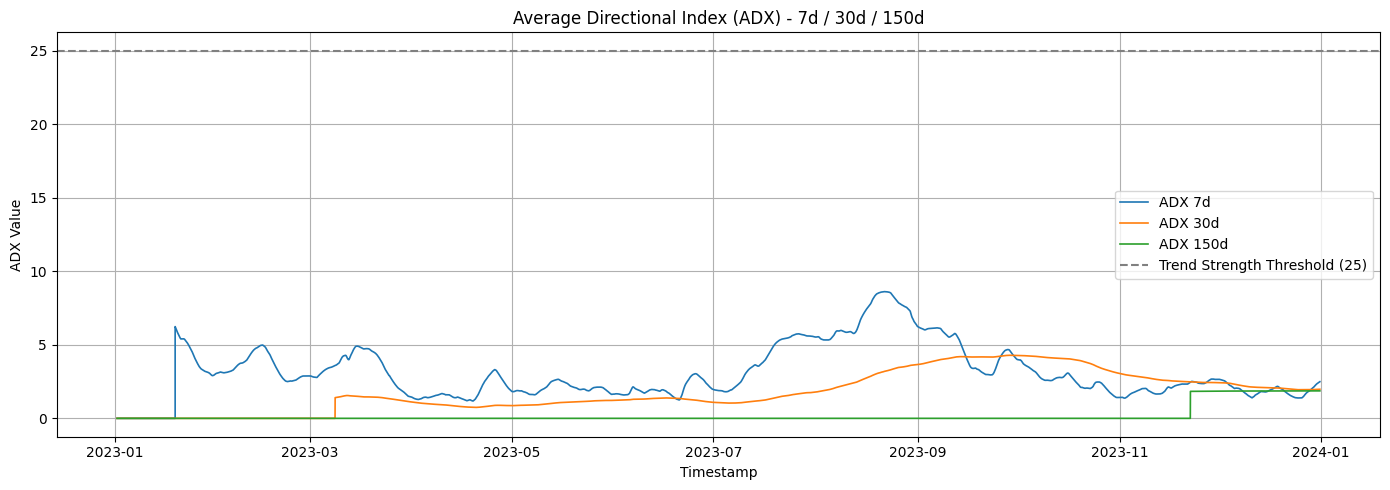

In [13]:
plt.figure(figsize=(14, 5))

# Plot each ADX line
plt.plot(df.index, df['adx_7d'], label='ADX 7d', linewidth=1.2)
plt.plot(df.index, df['adx_30d'], label='ADX 30d', linewidth=1.2)
plt.plot(df.index, df['adx_150d'], label='ADX 150d', linewidth=1.2)

# Add threshold line
plt.axhline(25, color='gray', linestyle='--', label='Trend Strength Threshold (25)')

# Styling
plt.title('Average Directional Index (ADX) - 7d / 30d / 150d')
plt.xlabel('Timestamp')
plt.ylabel('ADX Value')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## Momentum Indicator
RSI

In [14]:
df = momentum.compute_rsi(df, days=3)
df = momentum.compute_rsi(df, days=7)
df = momentum.compute_rsi(df, days=14)
df = momentum.compute_rsi(df, days=30)
df = momentum.compute_rsi(df, days=60)

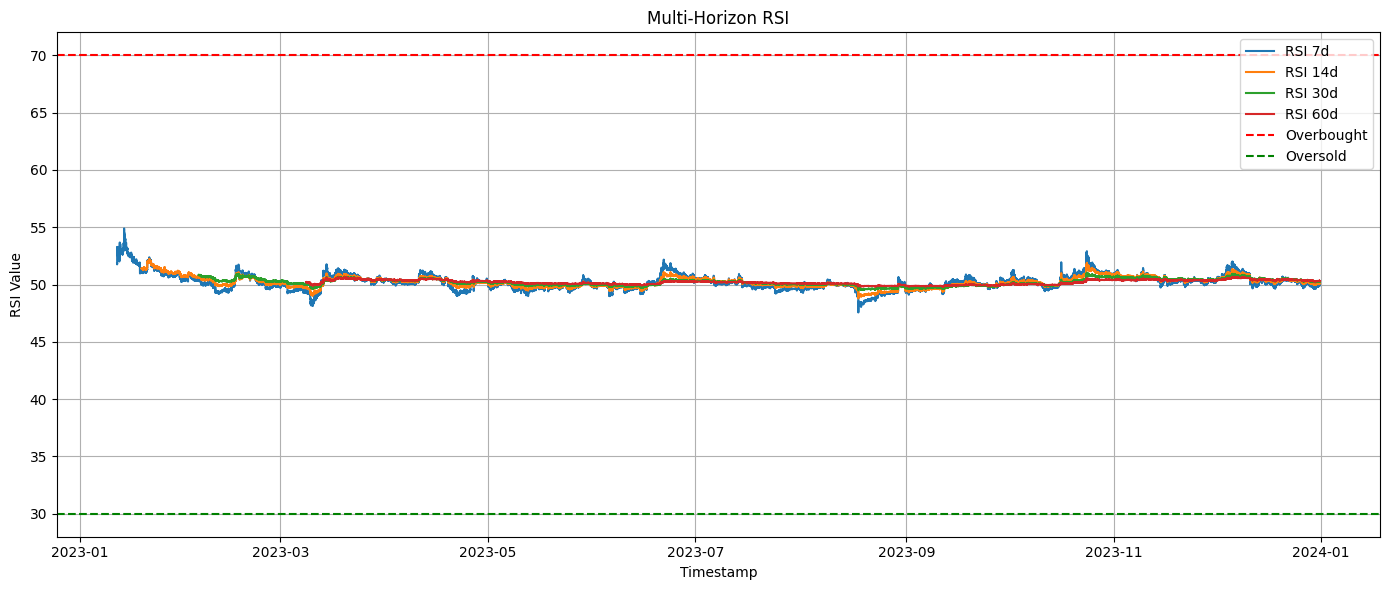

In [15]:
plt.figure(figsize=(14, 6))

plt.plot(df.index, df['rsi_7d'], label='RSI 7d')
plt.plot(df.index, df['rsi_14d'], label='RSI 14d')
plt.plot(df.index, df['rsi_30d'], label='RSI 30d')
plt.plot(df.index, df['rsi_60d'], label='RSI 60d')

plt.axhline(70, color='red', linestyle='--', label='Overbought')
plt.axhline(30, color='green', linestyle='--', label='Oversold')

plt.title('Multi-Horizon RSI')
plt.xlabel('Timestamp')
plt.ylabel('RSI Value')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Stochastic Oscillator

In [16]:
# stochastic oscillator
df = momentum.compute_stochastic(df, days=7)
df = momentum.compute_stochastic(df, days=30)
df = momentum.compute_stochastic(df, days=180)

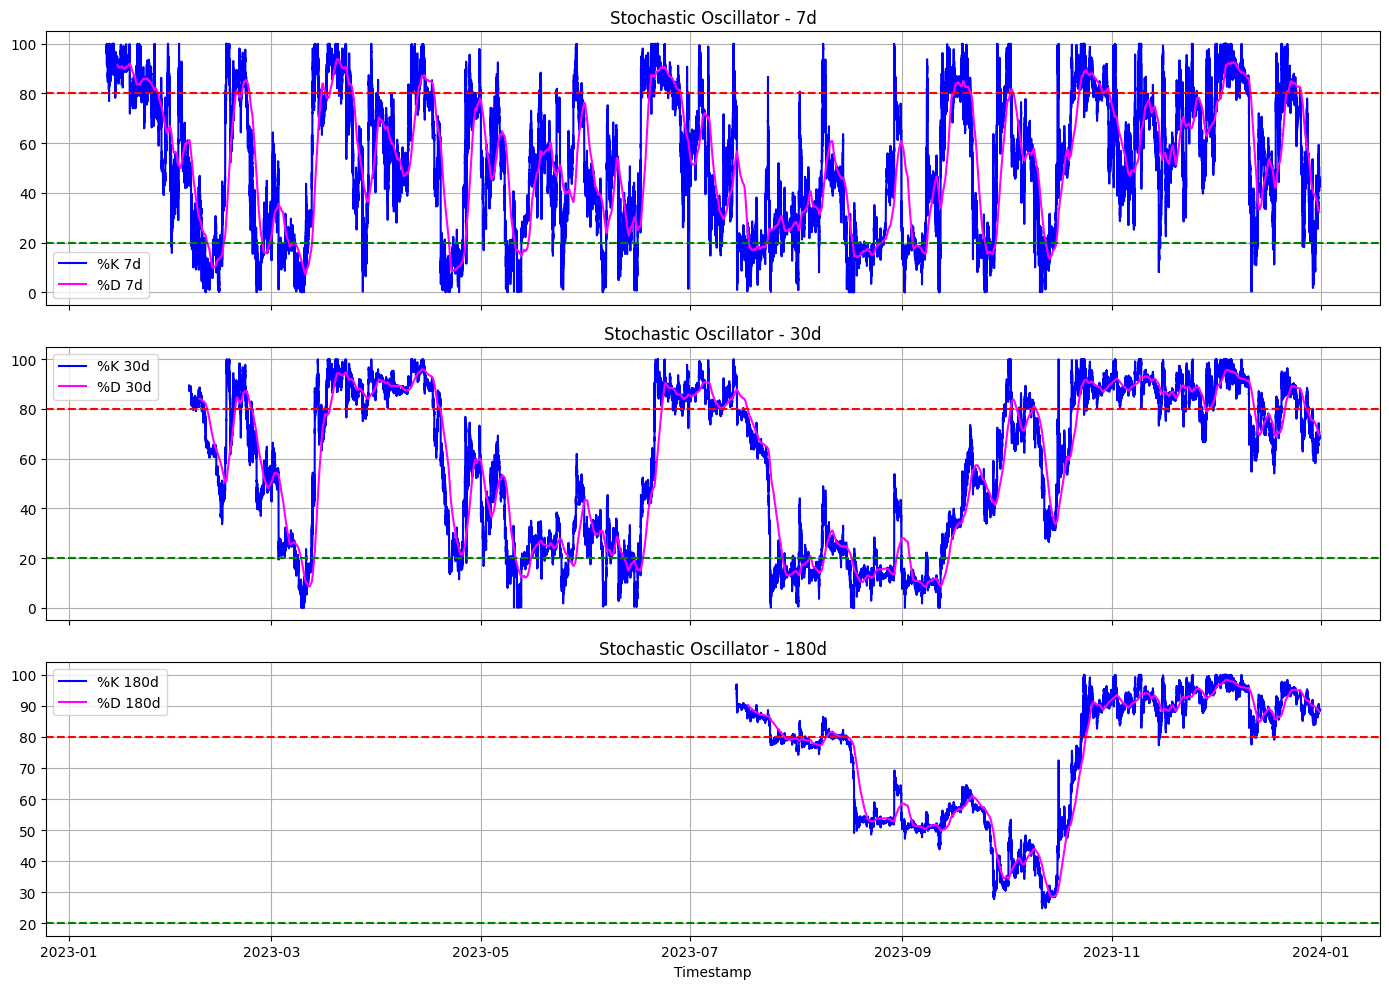

In [17]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(14, 10), sharex=True)

# --- 7-day Stochastic ---
axes[0].plot(df.index, df['stoch_k_7d'], label='%K 7d', color='blue')
axes[0].plot(df.index, df['stoch_d_7d'], label='%D 7d', color='magenta')
axes[0].axhline(80, color='red', linestyle='--')
axes[0].axhline(20, color='green', linestyle='--')
axes[0].set_title('Stochastic Oscillator - 7d')
axes[0].legend(); axes[0].grid(True)

# --- 30-day Stochastic ---
axes[1].plot(df.index, df['stoch_k_30d'], label='%K 30d', color='blue')
axes[1].plot(df.index, df['stoch_d_30d'], label='%D 30d', color='magenta')
axes[1].axhline(80, color='red', linestyle='--')
axes[1].axhline(20, color='green', linestyle='--')
axes[1].set_title('Stochastic Oscillator - 30d')
axes[1].legend(); axes[1].grid(True)

# --- 180-day Stochastic ---
axes[2].plot(df.index, df['stoch_k_180d'], label='%K 180d', color='blue')
axes[2].plot(df.index, df['stoch_d_180d'], label='%D 180d', color='magenta')
axes[2].axhline(80, color='red', linestyle='--')
axes[2].axhline(20, color='green', linestyle='--')
axes[2].set_title('Stochastic Oscillator - 180d')
axes[2].legend(); axes[2].grid(True)

# Final styling
plt.xlabel('Timestamp')
plt.tight_layout()
plt.show()

MACD

In [18]:
# MACD
df = momentum.compute_macd(df, 12, 26, 9)   # Standard
df.rename(columns={
    'macd': 'macd_12_26',
    'macd_signal': 'macd_sig_12_26',
    'macd_diff': 'macd_hist_12_26'
}, inplace=True)

df = momentum.compute_macd(df, 6, 13, 5)
df.rename(columns={
    'macd': 'macd_6_13',
    'macd_signal': 'macd_sig_6_13',
    'macd_diff': 'macd_hist_6_13'
}, inplace=True)

df = momentum.compute_macd(df, 24, 52, 18)
df.rename(columns={
    'macd': 'macd_24_52',
    'macd_signal': 'macd_sig_24_52',
    'macd_diff': 'macd_hist_24_52'
}, inplace=True)

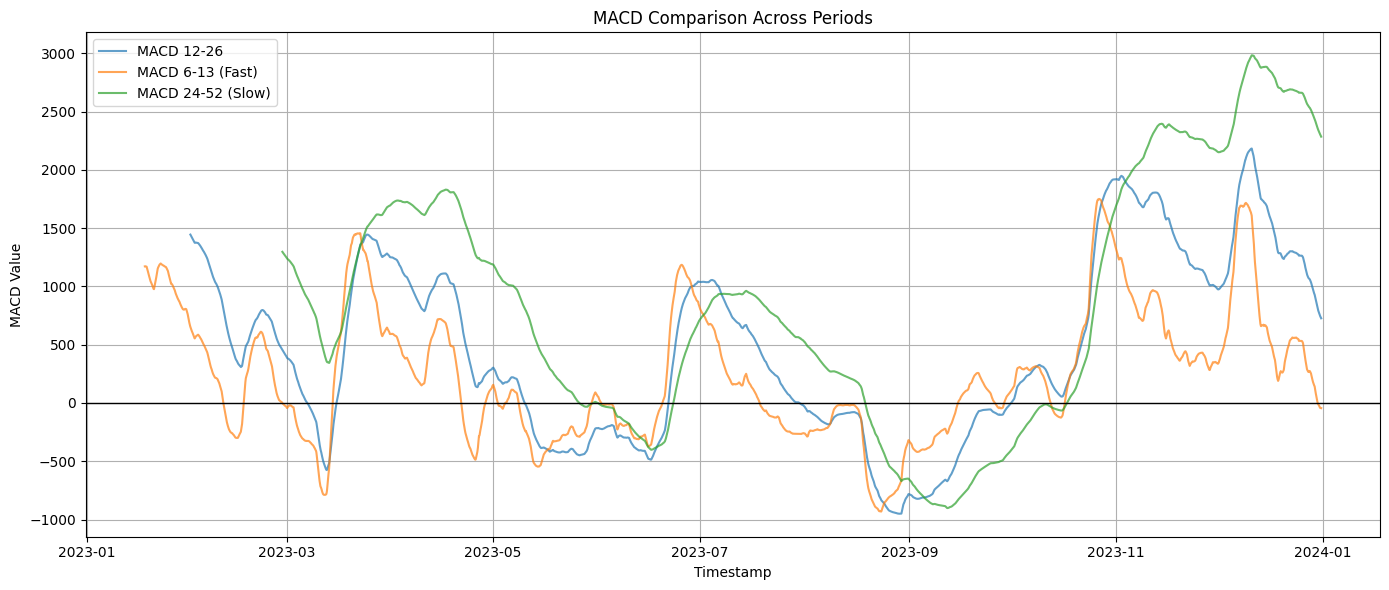

In [19]:
plt.figure(figsize=(14, 6))
plt.plot(df.index, df['macd_12_26'], label='MACD 12-26', alpha=0.7)
plt.plot(df.index, df['macd_6_13'], label='MACD 6-13 (Fast)', alpha=0.7)
plt.plot(df.index, df['macd_24_52'], label='MACD 24-52 (Slow)', alpha=0.7)

plt.title('MACD Comparison Across Periods')
plt.xlabel('Timestamp'); plt.ylabel('MACD Value')
plt.axhline(0, color='black', linewidth=1)
plt.legend(); plt.grid(True); plt.tight_layout()
plt.show()

Bollinger Bands

In [21]:
# Bollinger Bands
df = volatility.compute_bollinger_bands(df, days=20, std=2)


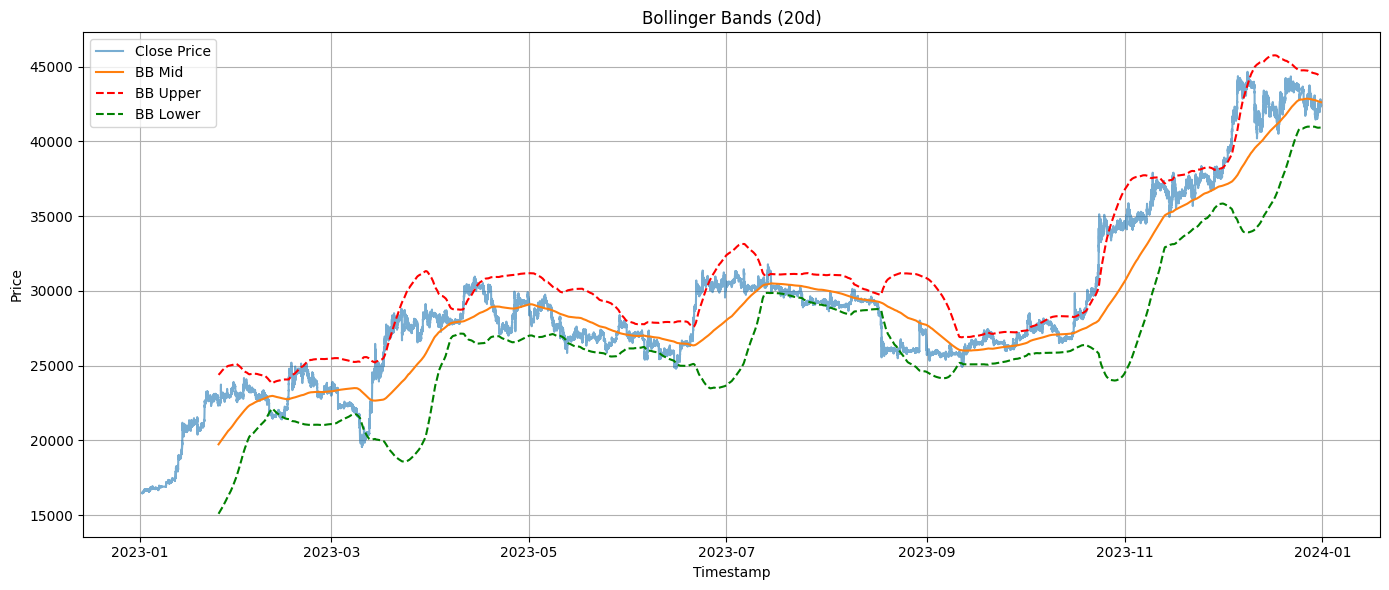

In [23]:
plt.figure(figsize=(14, 6))
plt.plot(df.index, df['Close'], label='Close Price', alpha=0.6)
plt.plot(df.index, df[f'bb_mid_20d'], label='BB Mid')
plt.plot(df.index, df[f'bb_upper_20d'], label='BB Upper', color='red', linestyle='--')
plt.plot(df.index, df[f'bb_lower_20d'], label='BB Lower', color='green', linestyle='--')
plt.title(f'Bollinger Bands (20d)')
plt.xlabel('Timestamp'); plt.ylabel('Price')
plt.legend(); plt.grid(); plt.tight_layout(); plt.show()

Average True Range

In [24]:
# ATR
df = volatility.compute_atr(df, days=14)


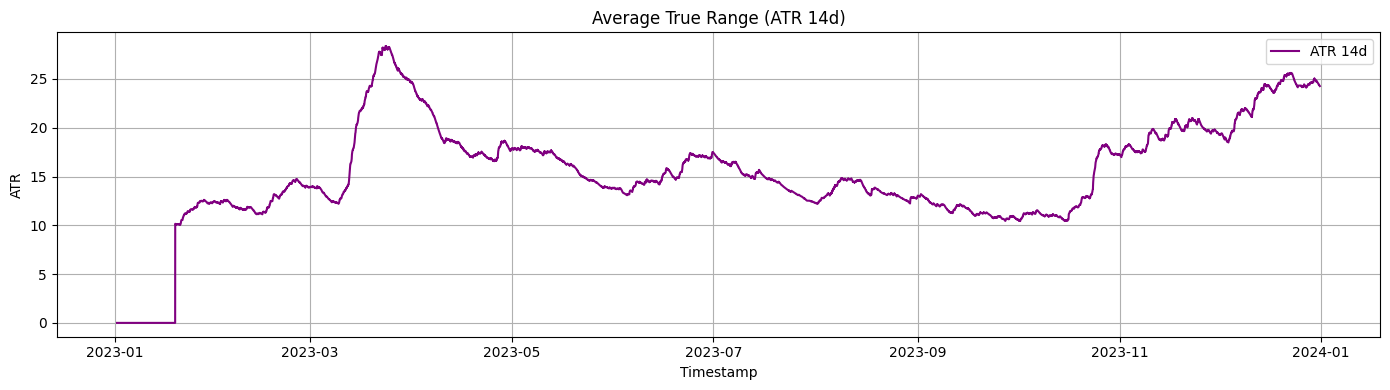

In [25]:
plt.figure(figsize=(14, 4))
plt.plot(df.index, df[f'atr_14d'], label=f'ATR 14d', color='purple')
plt.title(f'Average True Range (ATR 14d)')
plt.xlabel('Timestamp'); plt.ylabel('ATR')
plt.legend(); plt.grid(); plt.tight_layout(); plt.show()
